In [3]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile,join
from time import sleep
def P2dB(P): return 10*np.log10(np.abs(P))

In [13]:
#Sis=[ 0, 1, 2, 3, 4, 5,24,25,26,27,28,29,72,73,74,75,76, 77,90,91,92,93,94,95]
#Sis=[ 0, 1, 2, 3, 4, 5,72,73,74,75,76, 77,90,91,92,93,94,95]
meas_RCU2L = [0, 1, 6, 7, 28, 29]
Sis = [3*i+j for i in meas_RCU2L for j in range(3)]
sis=Sis

In [5]:
#fpath1='xst3_c10m'
fpath1='xst_mean'
fpath2='xst_mean'
files1=listdir(fpath1)#[f for f in listdir(fpath)];
files1.sort()
files1 = [f for f in files1 if isfile(join(fpath1,f))]
files2=listdir(fpath2)#[f for f in listdir(fpath)];
files2.sort()
files2 = [f for f in files2 if isfile(join(fpath2,f))]
print(len(files1),len(files2))
print(files1,files2)
#xst -> no calib
#xst2 -> step+delay, amp 
#xst3 -> all delay, no amp
#xst4 -> correct delay
#xst_t2 -> using t2 calibration

3 3
['xst_mean_2022-09-23-14.npz', 'xst_mean_2022-09-23-15.npz', 'xst_mean_2022-09-23-16.npz'] ['xst_mean_2022-09-23-14.npz', 'xst_mean_2022-09-23-15.npz', 'xst_mean_2022-09-23-16.npz']


In [38]:
D1=[]
Cnt1=[]
for fn in files1:
    print(fn)
    Dx=np.load(fpath1+"/"+fn)
    D1.append(Dx['xst'])
    Cnt1.append(Dx['cnt'])
#    dates.append(fn.split('.')[0][9:])
D1=np.array(D1)
Cnt1=np.array(Cnt1)
print(D1.shape,Cnt1.shape)
print(Cnt1[:,10])

xst_mean_2022-09-23-14.npz
xst_mean_2022-09-23-15.npz
xst_mean_2022-09-23-16.npz
(3, 512, 18, 18) (3, 512)
[12 12 12]


In [39]:
D2=[]
Cnt2=[]
for fn in files2[2:3]:
    Dx=np.load(fpath2+"/"+fn)
    D2.append(Dx['xst'])
    Cnt2.append(Dx['cnt'])
#    dates.append(fn.split('.')[0][9:])
D2=np.array(D2)
Cnt2=np.array(Cnt2)
print(D2.shape,Cnt2.shape)
print(Cnt2[:,10])

(1, 512, 18, 18) (1, 512)
[12]


In [40]:
D1b=np.sum(D1[:,:]*Cnt1[:,:,np.newaxis,np.newaxis],axis=0)/np.sum(Cnt1[:,:],axis=0)[:,np.newaxis,np.newaxis]
D2b=np.sum(D2[:,:]*Cnt2[:,:,np.newaxis,np.newaxis],axis=0)/np.sum(Cnt2[:,:],axis=0)[:,np.newaxis,np.newaxis]

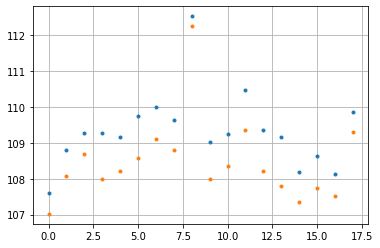

In [41]:
pwr1=[P2dB(np.sum(D1b[:,i,i])+1) for i in range(18)]
pwr2=[P2dB(np.sum(D2b[:,i,i])+1) for i in range(18)]
plt.plot(pwr1,'.')
plt.plot(pwr2,'.')
plt.grid()

In [42]:
sis=np.array(range(len(pwr1)))
#sis=sis.compress((np.array(pwr)>10)*(np.array(pwr)<120))
#sis=[0,1,2,3,4,5]
print(sis)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [43]:
cal_values = np.loadtxt('DTS_calibration.csv', delimiter = ",")
cable_lengths = [ cal_values[si][1] for si in sis] 
cable_lengths=np.array(cable_lengths)
cable_lengths=[ 6.45685457,  3.29329562, -1.34565792, -0.88381208, -1.29257817,  3.93372761,
 -1.35487199, -0.58695398, -1.21509496,  2.64028322, -1.0826589,   2.81539038,
  3.79914009,  2.58559774, -1.20104721, -0.8632767,  -0.90194634, -0.7529706 ]
cable_lengths=np.array(cable_lengths)*1e-9
cable_lengths-=np.mean(cable_lengths)
print(cable_lengths)


[ 5.67666455e-09  2.51310560e-09 -2.12584794e-09 -1.66400210e-09
 -2.07276819e-09  3.15353759e-09 -2.13506201e-09 -1.36714400e-09
 -1.99528498e-09  1.86009320e-09 -1.86284892e-09  2.03520036e-09
  3.01895007e-09  1.80540772e-09 -1.98123723e-09 -1.64346672e-09
 -1.68213636e-09 -1.53316062e-09]


In [44]:
#sis=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
sis=[0,1,2,3,4,5,7,6,8,9,10,11,12,13,14,15,16,17]
pairs=[[x,x+2] for i,x in enumerate(sis[:-2])]
#pairs=[[sis[x],sis[x+2]] for x in range(16)]
#pairs=[[x,y] for i,x in enumerate(sis) for y in sis[i+1:i+2]]
print(pairs)


[[0, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7], [7, 9], [6, 8], [8, 10], [9, 11], [10, 12], [11, 13], [12, 14], [13, 15], [14, 16], [15, 17]]


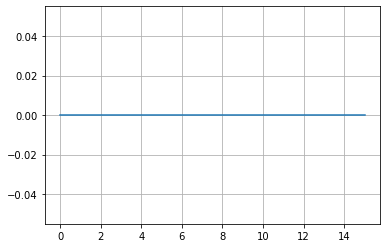

In [45]:
PPwr=[np.sum(P2dB(np.roll(D2[:,p[1],p[0]],-7)+1e-6)[1:]) for p in pairs]
plt.plot(PPwr)
Pcut=12000
plt.grid()
#plt.ylim(5000,8000)

Text(0.5, 0, 'Frequency (MHz)')

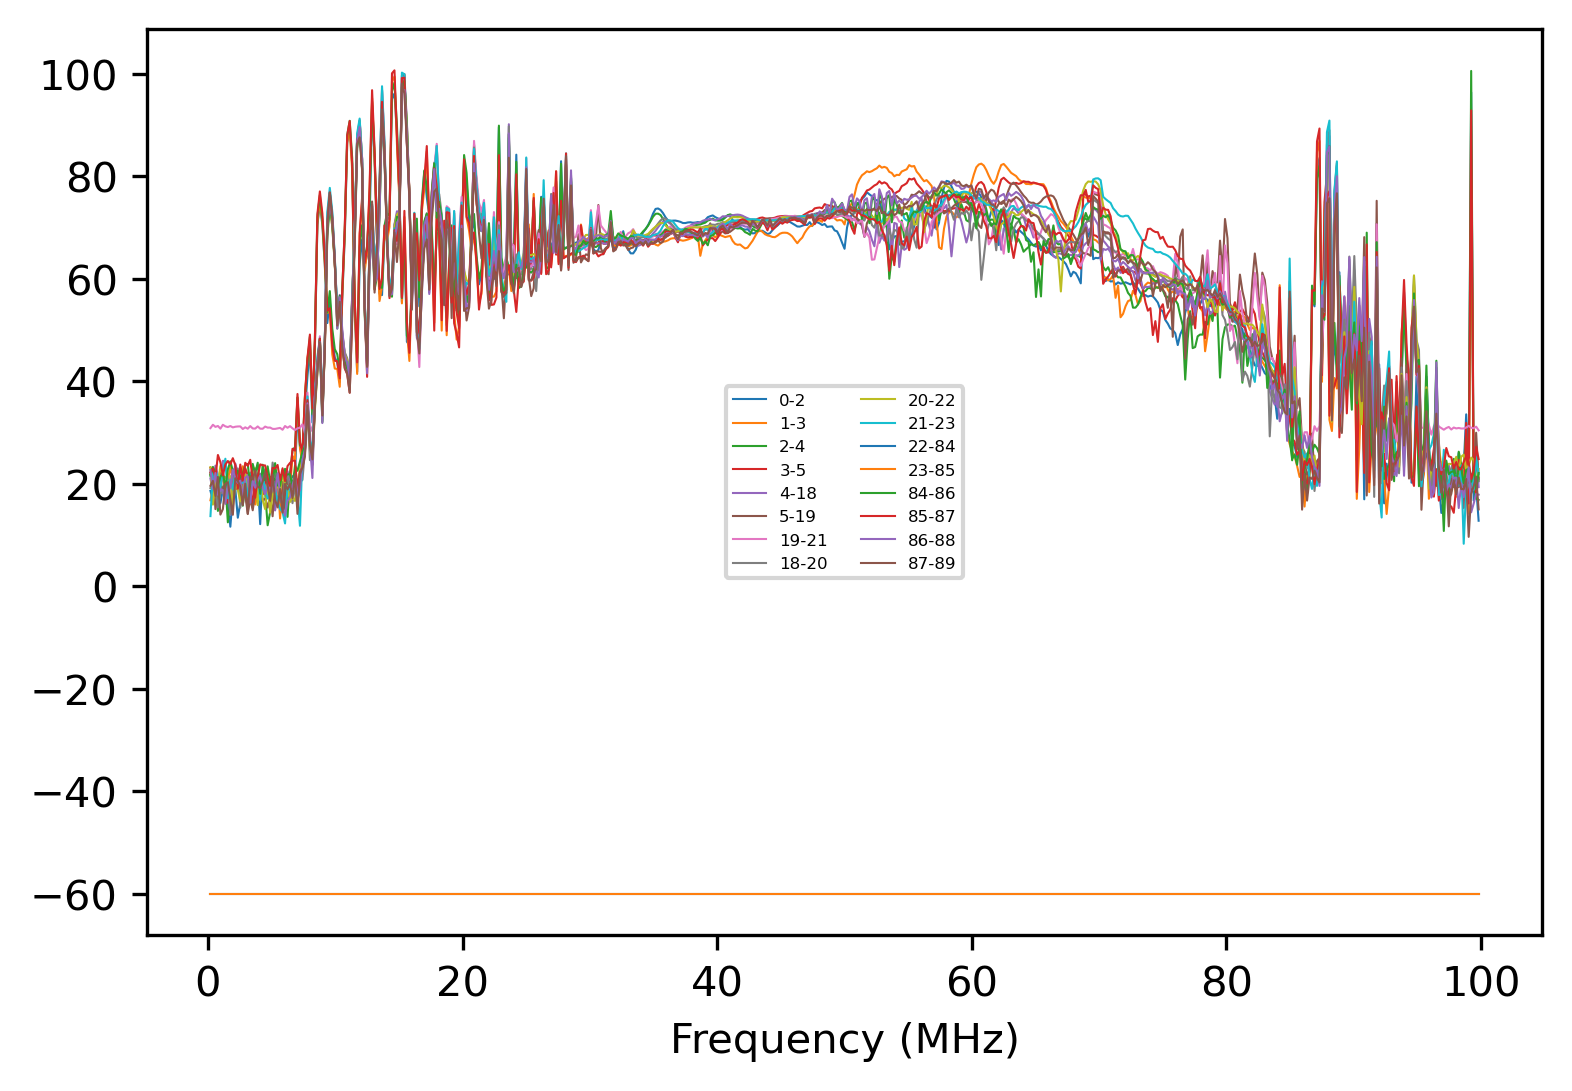

In [46]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs[:]):
    plt.plot(freq[1:],P2dB(np.roll(D1b[:,p2,p1],-0)+1e-6)[1:],'-',label='%i-%i'%(Sis[p1],Sis[p2]),linewidth=0.5)
#plt.gca().set_prop_cycle(None)
#for i,[p1,p2] in enumerate(pairs[2:8]):
#    plt.plot(freq[1:],P2dB(np.roll(D2b[:,p2,p1],-0)+1e-6)[1:],'-',linewidth=0.5)

plt.legend(fontsize=4,ncol=2)
#plt.ylim(55,75)
#plt.xlim(30,70)
#plt.xlim(20,30)
#plt.ylim(10,90)
plt.xlabel("Frequency (MHz)")

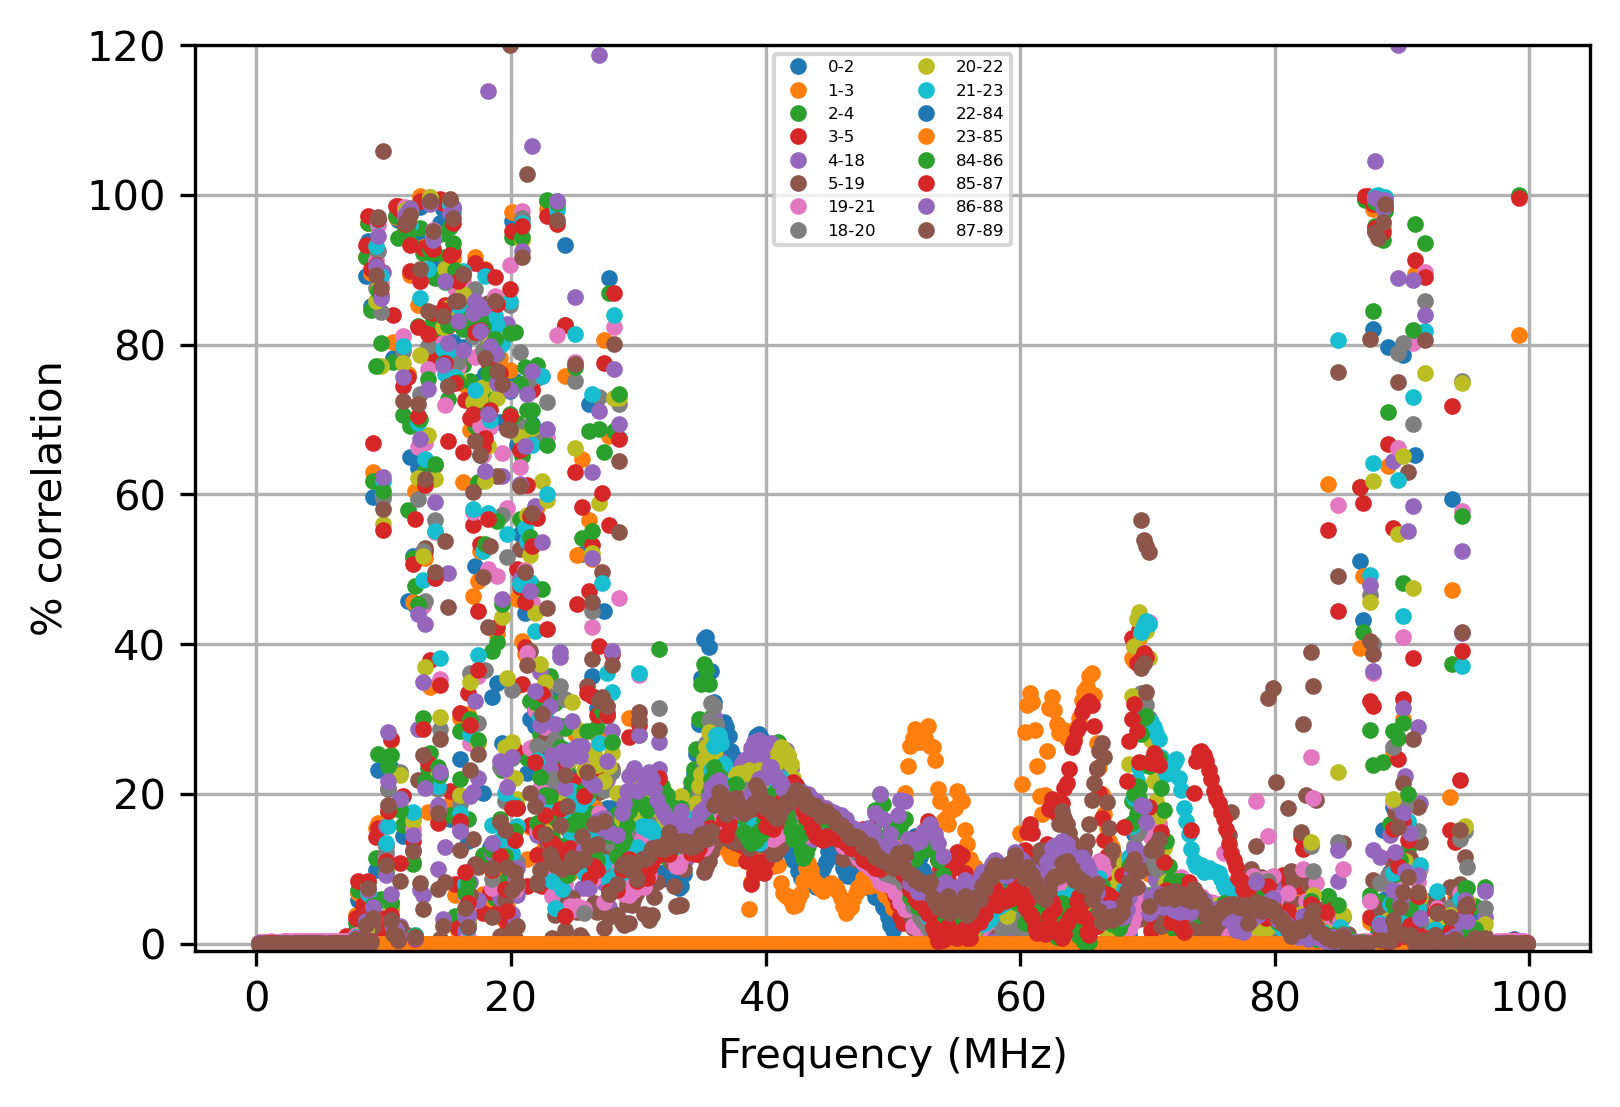

In [47]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs[:]):
    plt.plot(freq[1:],100*np.abs(np.roll(D1b[:,p2,p1]/np.sqrt(D1b[:,p2,p2]*D1b[:,p1,p1]),-0)+1e-6)[1:],'.',label='%i-%i'%(Sis[p1],Sis[p2]),linewidth=0.5)
#plt.gca().set_prop_cycle(None)
#for i,[p1,p2] in enumerate(pairs[2:8]):
#    plt.plot(freq[1:],P2dB(np.roll(D2b[:,p2,p1],-0)+1e-6)[1:],'-',linewidth=0.5)
plt.ylim(-1,120)
plt.legend(fontsize=4,ncol=2)
#plt.ylim(55,75)
#plt.xlim(30,70)
#plt.xlim(20,30)
#plt.ylim(10,90)
plt.xlabel("Frequency (MHz)")
plt.ylabel("% correlation");plt.grid()

Text(0.5, 0, 'Frequency (MHz)')

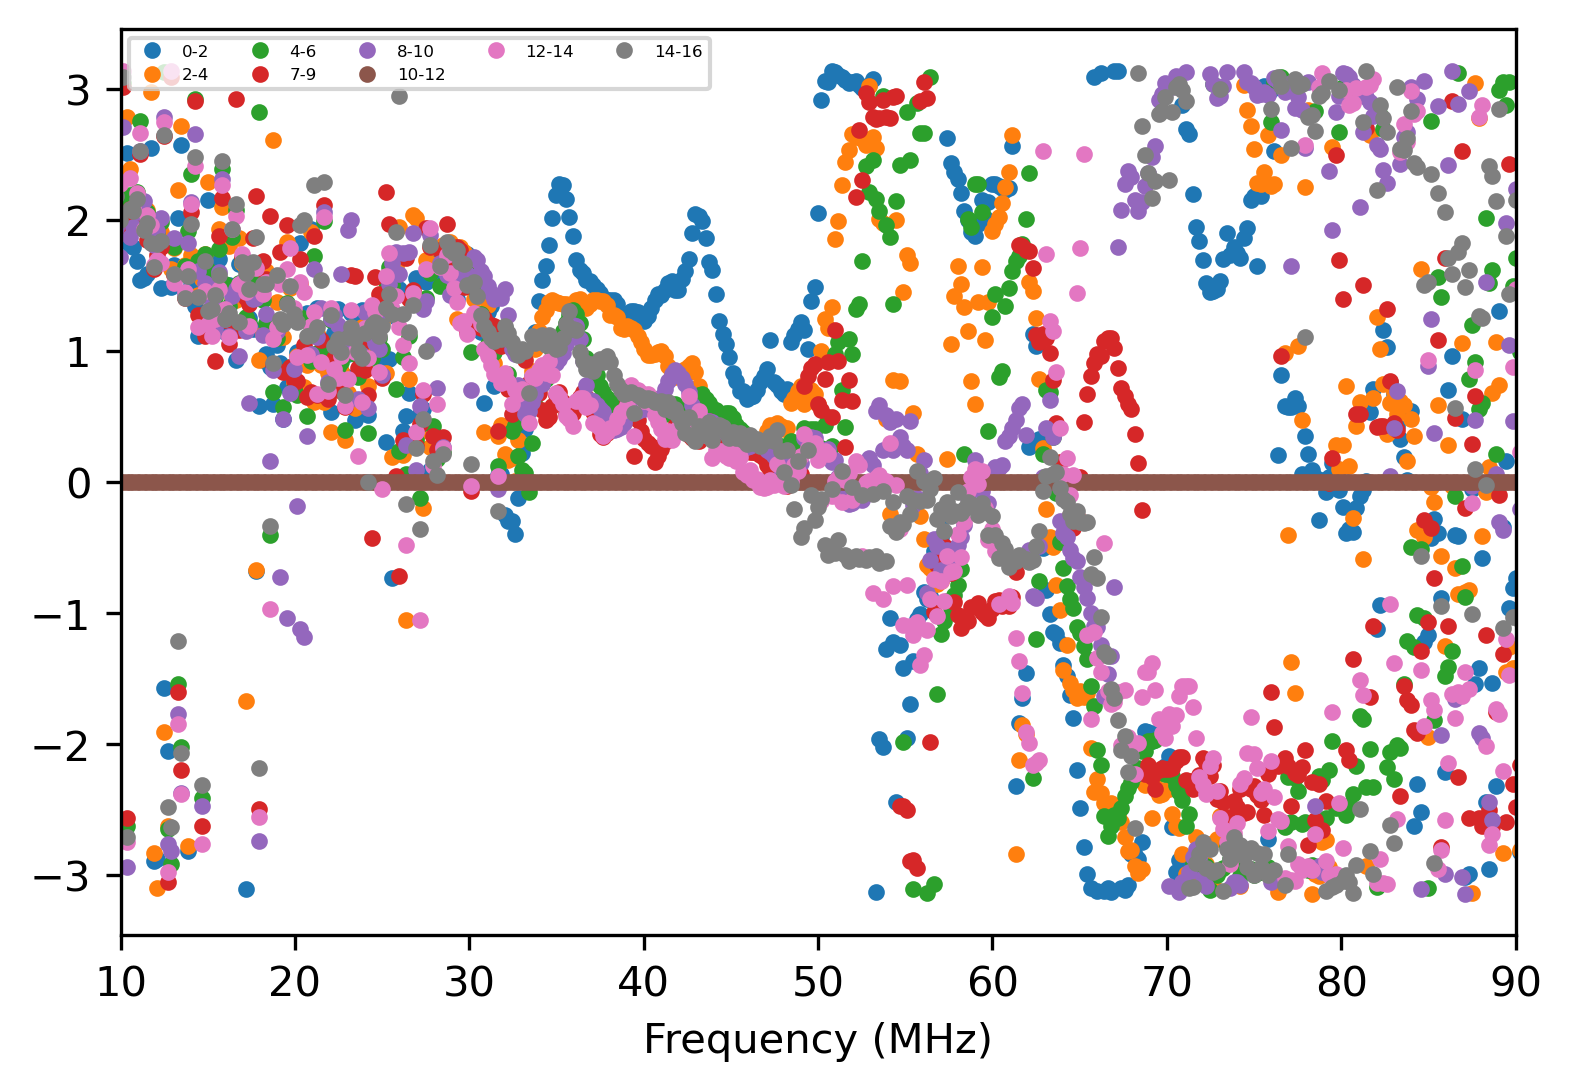

In [48]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs[::2]):
    dl=cable_lengths[p2]-cable_lengths[p1] #s
#    print(dl*40e6)
    corr=np.exp(2j*np.pi*freq[:]*1e6*dl*0)
    plt.plot(freq[1:],np.angle(-np.roll(D1b[:,p2,p1],-0)*corr)[1:],'.',label='%i-%i'%(p1,p2),linewidth=1)
#plt.gca().set_prop_cycle(None)
#for i,[p1,p2] in enumerate(pairs[::2]):
#    plt.plot(freq[1:],np.angle(np.roll(-D1b[:,p2,p1],-0))[1:],'.',label='%i-%i'%(p1,p2),linewidth=0.5,markersize=2)
plt.legend(fontsize=4,ncol=5)
#plt.ylim(0,60)
plt.xlim(10,90)
#plt.xlim(20,28)
plt.xlabel("Frequency (MHz)")

Text(0.5, 1.0, 'DTS LBA: XST Phase of shortest baselines (calibrated)')

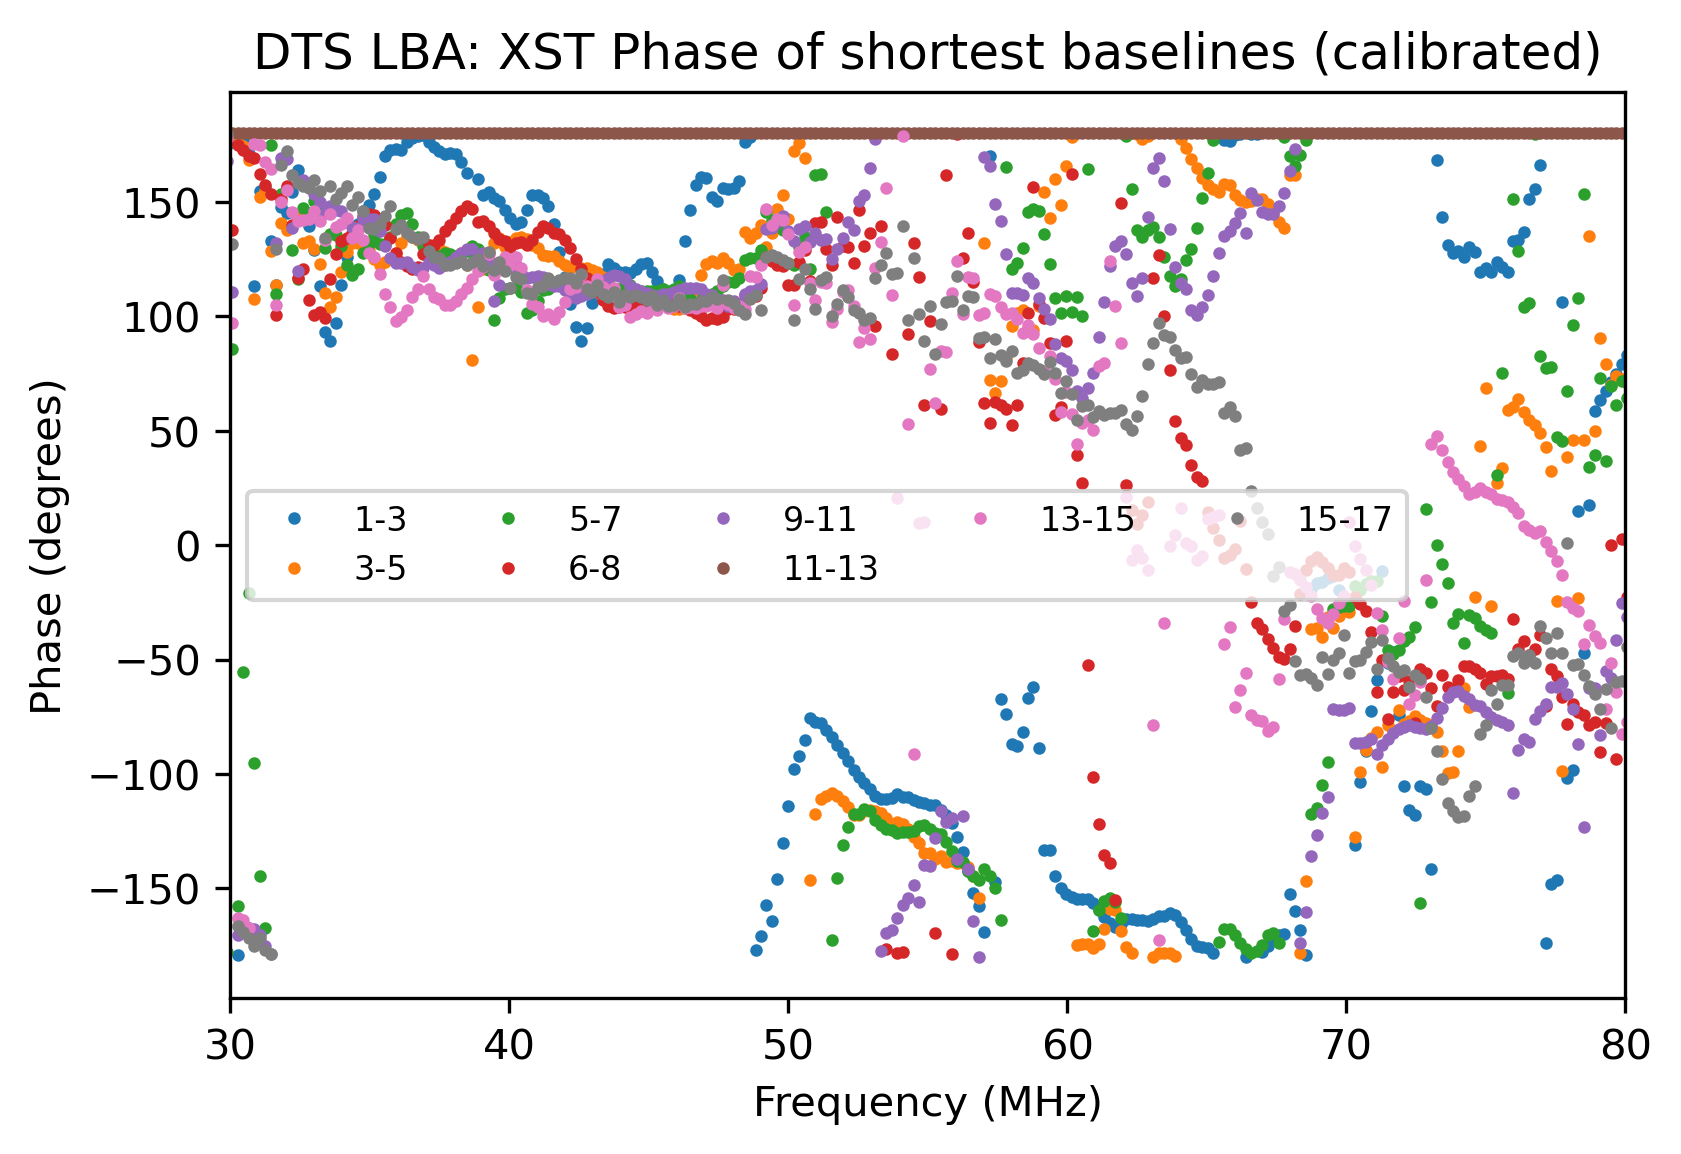

In [49]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs[1::2]):
    dl=cable_lengths[p2]-cable_lengths[p1] #s
#    print(dl*40e6)
    corr=np.exp(2j*np.pi*freq[:]*1e6*dl*0)
#    if p1==11: corr=np.exp(2j*np.pi*freq[:]*1e6*10e-9)
#    if p1==11: corr=-1
    plt.plot(freq[1:],np.angle(-np.roll(1j*D1b[:,p2,p1],0)*corr)[1:]/np.pi*180,'.',label='%i-%i'%(p1,p2),linewidth=1,markersize=4)
#plt.gca().set_prop_cycle(None)
#for i,[p1,p2] in enumerate(pairs[1::2]):
#    plt.plot(freq[1:],np.angle(np.roll(D1b[:,p2,p1],0))[1:],':',linewidth=0.5)
plt.legend(fontsize=8,ncol=5)
#plt.ylim(0,60)
plt.xlim(30,80)
#plt.xlim(20,28)
plt.xlabel("Frequency (MHz)");plt.ylabel("Phase (degrees)")
plt.title("DTS LBA: XST Phase of shortest baselines (calibrated)")

Text(0.5, 1.0, 'DTS LBA: XST Phase of shortest baselines (calibrated)')

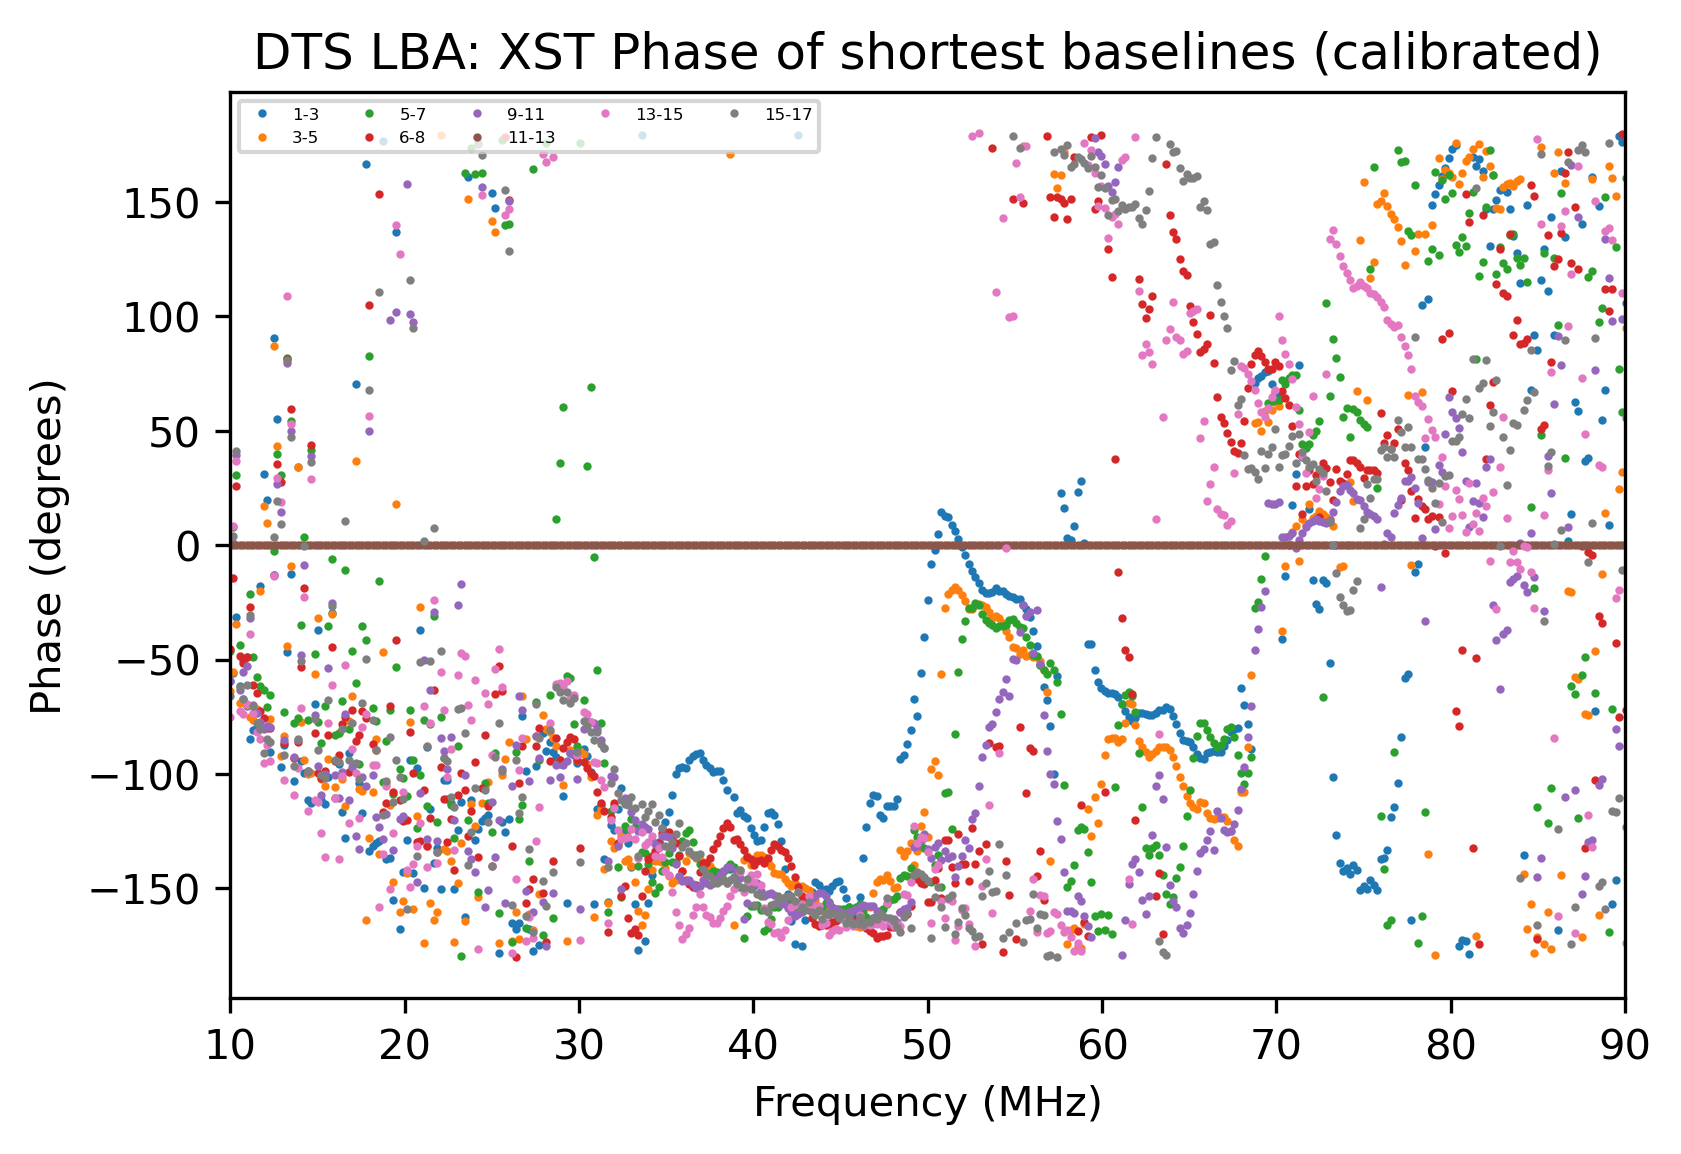

In [50]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs[1::2]):
    dl=cable_lengths[p2]-cable_lengths[p1] #s
#    print(dl*40e6)
    corr=np.exp(2j*np.pi*freq[:]*1e6*dl*0)
    plt.plot(freq[1:],np.angle(np.roll(D1b[:,p2,p1],0)*corr)[1:]/np.pi*180,'.',label='%i-%i'%(p1,p2),linewidth=1,markersize=2)
#plt.gca().set_prop_cycle(None)
#for i,[p1,p2] in enumerate(pairs[1::2]):
#    plt.plot(freq[1:],np.angle(np.roll(D1b[:,p2,p1],0))[1:],':',linewidth=0.5)
plt.legend(fontsize=4,ncol=5)
#plt.ylim(0,60)
plt.xlim(10,90)
#plt.xlim(20,28)
plt.xlabel("Frequency (MHz)");plt.ylabel("Phase (degrees)")
plt.title("DTS LBA: XST Phase of shortest baselines (calibrated)")

Text(0.5, 0, 'Frequency (MHz)')

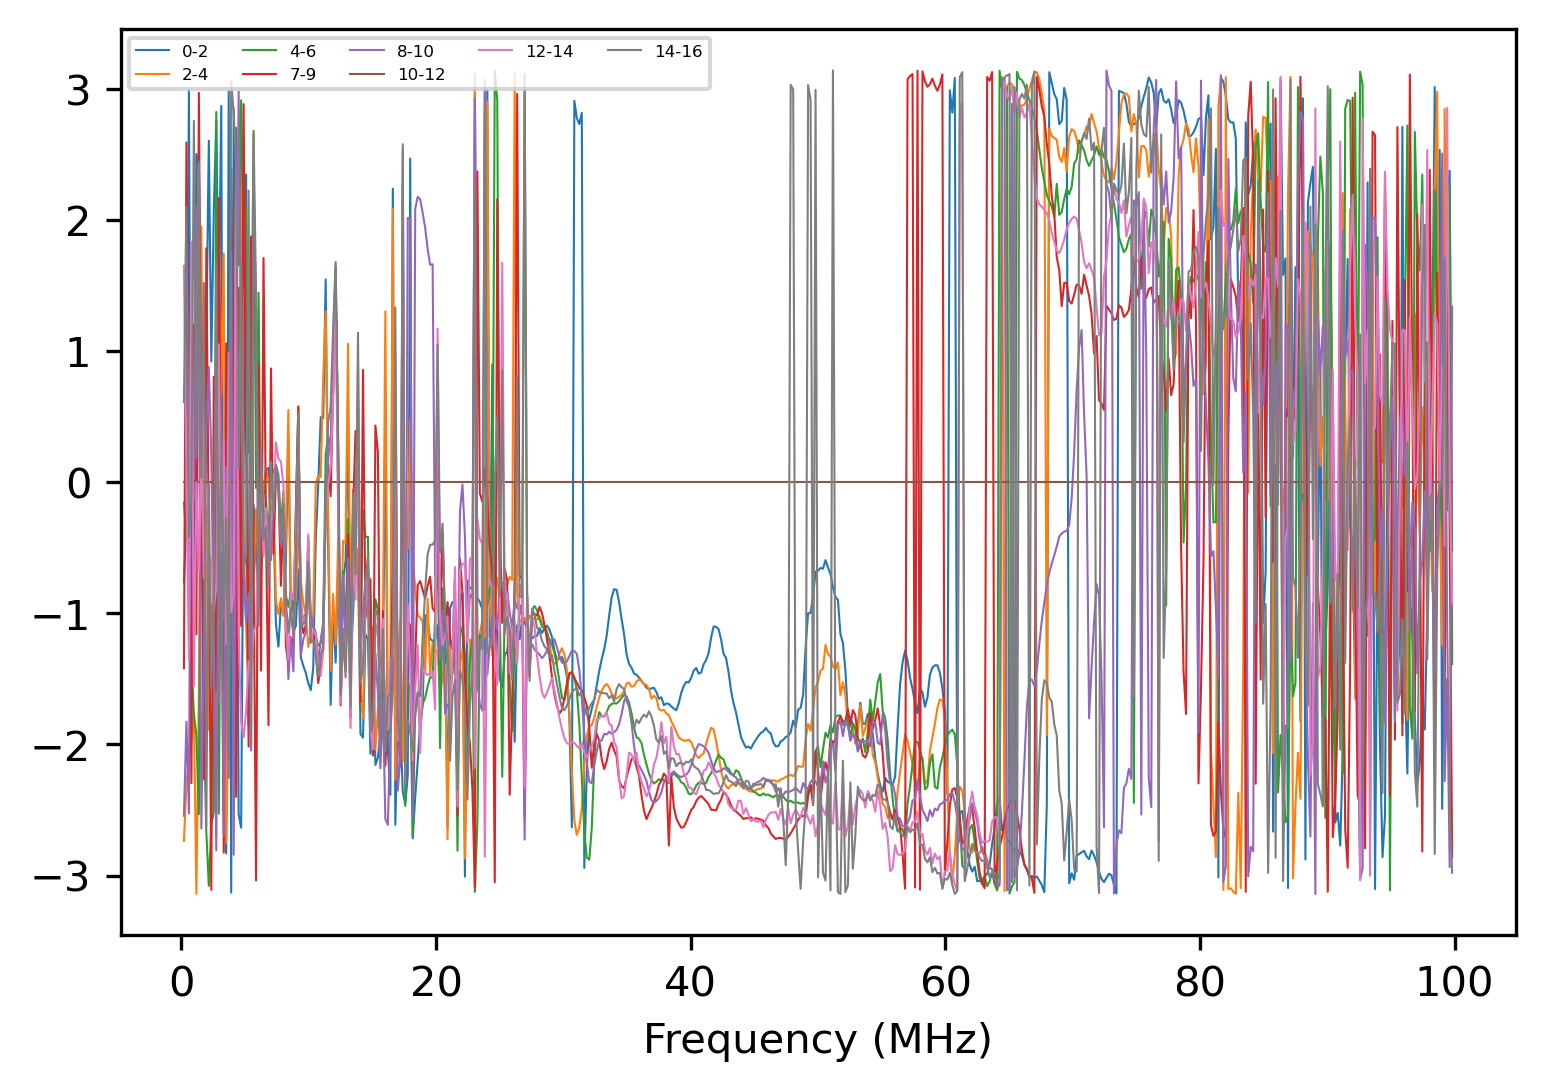

In [51]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs[::2]):
#    if PPwr[i]<Pcut: continue;
#    plt.plot(freq[1:],P2dB(np.roll(D2[:,p2,p1],-7)+1e-6)[1:],label='%i-%i'%(p1,p2),linewidth=0.05)
    plt.plot(freq[1:],np.angle(np.roll(D2b[:,p2,p1],-6))[1:],label='%i-%i'%(p1,p2),linewidth=0.5)
plt.legend(fontsize=4,ncol=5)
#plt.ylim(0,60)
plt.xlabel("Frequency (MHz)")

ValueError: x and y must have same first dimension, but have shapes (511,) and (0, 18)

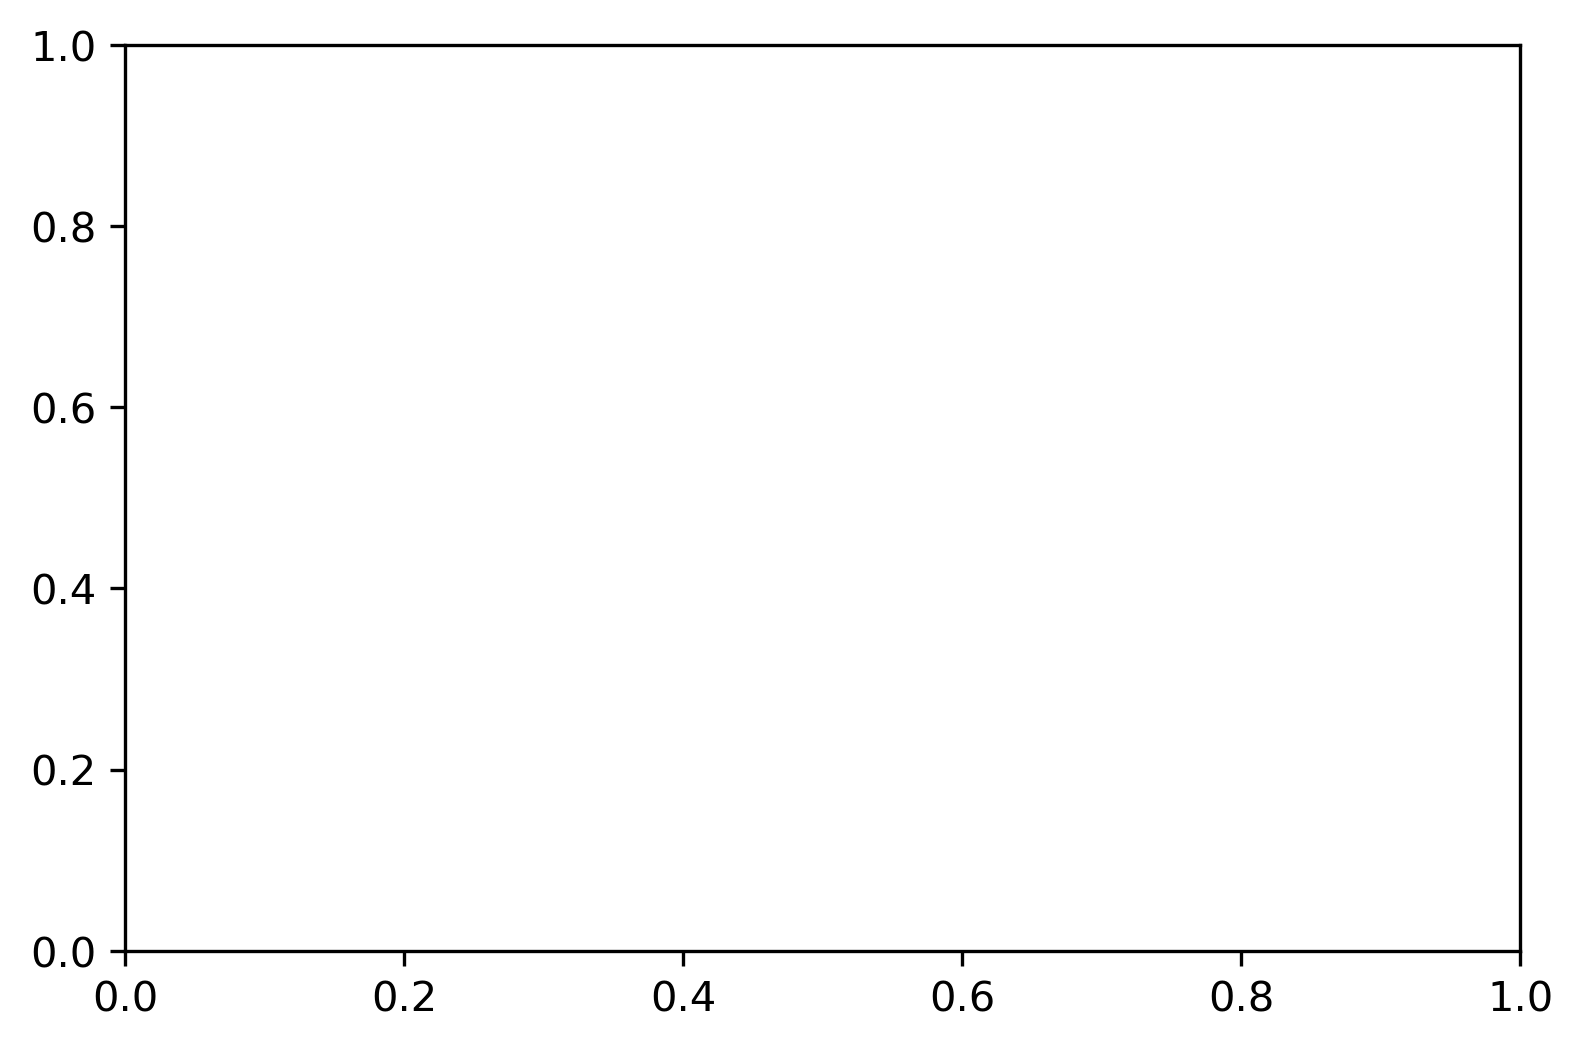

In [32]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs[1::2]):
#    if PPwr[i]<Pcut: continue;
#    plt.plot(freq[1:],P2dB(np.roll(D2[:,p2,p1],-7)+1e-6)[1:],label='%i-%i'%(p1,p2),linewidth=0.05)
    plt.plot(freq[1:],np.angle(np.roll(D2[:,p2,p1],-6))[1:],label='%i-%i'%(p1,p2),linewidth=0.5)
plt.legend(fontsize=4,ncol=5)
#plt.ylim(0,60)
plt.xlabel("Frequency (MHz)")

In [ ]:
cntmean=(np.mean(np.sum(Cnt,axis=0)))
print(P2dB(cntmean**2))

In [ ]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
P1=np.zeros_like(freq[1:],dtype='float')
P2=np.zeros_like(freq[1:],dtype='complex')
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS

cnt=0;
for i,[p1,p2] in enumerate(pairs):
    if PPwr[i]>Pcut: continue;
    P1+=np.abs(np.roll(D2[:,p2,p1],-7)[1:])
    P2+=(np.roll(D2[:,p2,p1],-7)[1:])
    cnt+=1
    plt.plot(freq[1:],P2dB(np.roll(D2[:,p2,p1],-7)+1e-6)[1:]-GainADC,linewidth=0.1)
for i in sis[4:]:
    plt.plot(freq[1:],P2dB(np.roll(D2[:,i,i],-7))[1:]-30+5-GainADC,'m-',linewidth=0.5,label=('Station-only correlated noise < RCU noise - 25dB < sky noise - 30dB' if i==4 else ''))
#plt.plot(freq[1:],P2dB(P2/np.sqrt(cnt))-GainADC,'r-',linewidth=0.5,label='avg pwr')
#plt.plot(freq[1:],P2dB(P1/(cnt))-GainADC,'k-',linewidth=0.5,label='avg correlation')
plt.legend(fontsize=8,ncol=1)
#plt.ylim(0,30)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dBFS)")
plt.title("RCU2L-QM in DTS outside: Correlation between \npairs of channels. LBA off")

ValueError: x and y must have same first dimension, but have shapes (511,) and (0, 18)

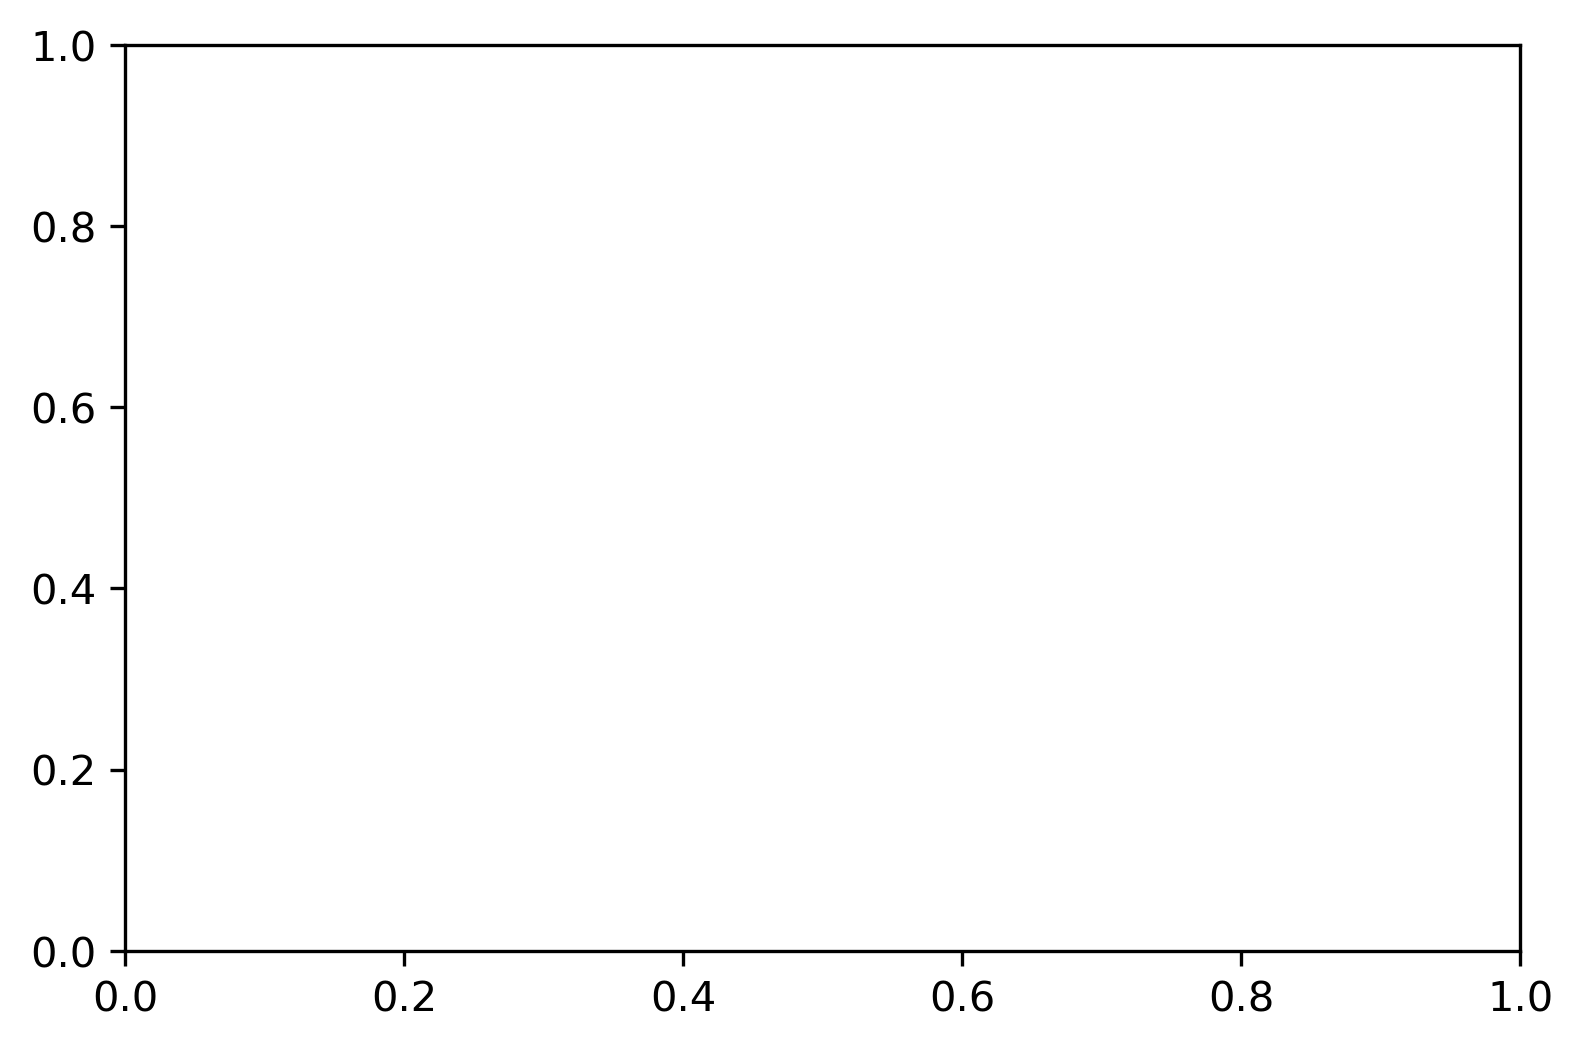

In [354]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs):
    if PPwr[i]>Pcut: continue;
    plt.plot(freq[1:],np.angle(np.roll(D2[:,p2,p1],-7)+1e-6)[1:],'.',markersize=0.2,label='%i-%i'%(p1,p2),linewidth=0.05)
#plt.legend(fontsize=4,ncol=5)
#plt.ylim(0,60)
plt.xlabel("Frequency (MHz)")